In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from io import StringIO
import seaborn as sns

In [2]:
# raw_data = pd.read_csv("consumer_complaints.csv",encoding="latin-1")

import pandas as pd
from urllib.parse import quote_plus
from sqlalchemy import create_engine

# PostgreSQL database connection URL (update with your actual database URL)

# Create a SQLAlchemy engine to connect to the database
engine = create_engine("postgresql://postgres:%s@localhost:5432/finance" % quote_plus("Shubham@123"))

# SQL query to fetch data from the database (replace with your query)
sql_query = "SELECT * FROM us_data"

# Execute the query and load the results into a pandas DataFrame
raw_data = pd.read_sql_query(sql_query, engine)

# Close the database connection when done
engine.dispose()

# Print the first few rows of the DataFrame
print(raw_data.shape)
raw_data.dtypes

(8664, 11)


complaint_id                     int64
date_received                   object
date_sent_to_company            object
product                         object
consumer_complaint_narrative    object
submittedvia                    object
timelyresponse                  object
issue                           object
subissue                        object
company                         object
state                           object
dtype: object

In [3]:
!pip list

Package                                  Version
---------------------------------------- ---------------
accelerate                               0.25.0
aiobotocore                              2.5.0
aiofiles                                 23.2.1
aiohttp                                  3.8.5
aioitertools                             0.7.1
aiosignal                                1.2.0
aiosqlite                                0.18.0
alabaster                                0.7.12
alembic                                  1.12.0
anaconda-anon-usage                      0.4.2
anaconda-catalogs                        0.2.0
anaconda-client                          1.12.0
anaconda-cloud-auth                      0.1.3
anaconda-navigator                       2.5.0
anaconda-project                         0.11.1
anyio                                    3.5.0
appdirs                                  1.4.4
argon2-cffi                              21.3.0
argon2-cffi-bindings                    

In [26]:
raw_data.head()

,complaint_id,date_received,date_sent_to_company,product,consumer_complaint_narrative
0,7466373,08/29/23,08/29/23,Credit reporting or other personal consumer re...,
1,7463639,08/28/23,08/28/23,Credit reporting or other personal consumer re...,
2,7467616,08/29/23,08/29/23,Debt collection,
3,7459863,08/28/23,08/29/23,Debt collection,
4,7466733,08/29/23,08/29/23,Debt collection,The debt collector failed to send communicatio...


In [27]:
data = raw_data[['product','consumer_complaint_narrative']]
data = data.replace('',None)
data = data[data['consumer_complaint_narrative'].notnull()]

In [28]:
data.shape

(328, 2)

In [29]:
data.isnull().sum()

product                         0
consumer_complaint_narrative    0
dtype: int64

In [30]:
data.groupby('product').consumer_complaint_narrative.count()

product
Checking or savings account                                74
Credit card                                                54
Credit reporting or other personal consumer reports        69
Debt collection                                            55
Debt or credit management                                   2
Money transfer, virtual currency, or money service         15
Mortgage                                                   29
Payday loan, title loan, personal loan, or advance loan     1
Prepaid card                                                5
Student loan                                                2
Vehicle loan or lease                                      22
Name: consumer_complaint_narrative, dtype: int64

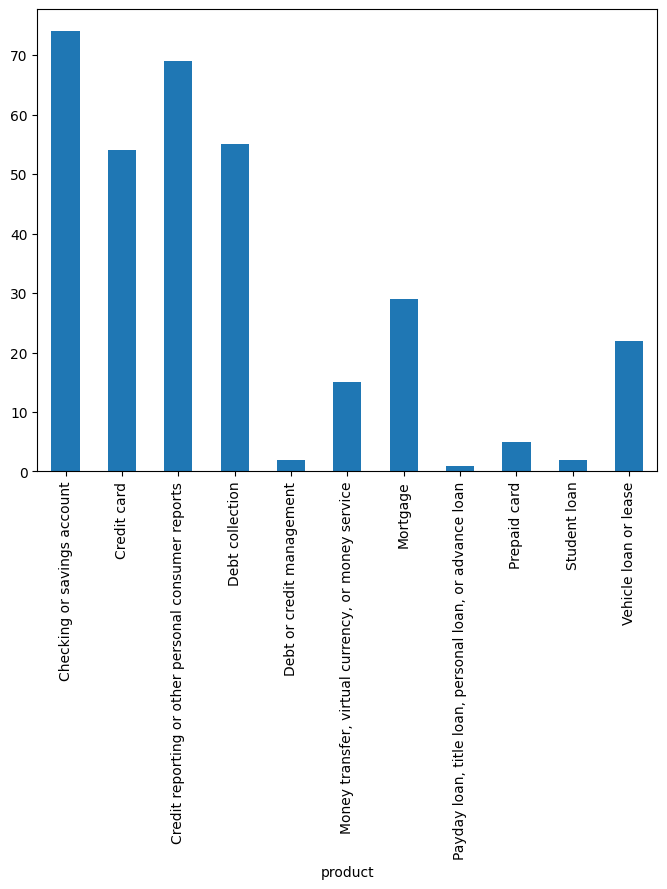

In [31]:
fig = plt.figure(figsize=(8,6))
data.groupby('product').consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [32]:
trainx,testx,trainy,testy = model_selection.train_test_split(data['consumer_complaint_narrative'],data['product'])

In [33]:
encoder = preprocessing.LabelEncoder()
trainy = encoder.fit_transform(trainy)
testy = encoder.fit_transform(testy)

tfidf_vect = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}',max_features=5000)
tfidf_vect.fit(data['consumer_complaint_narrative'])
xtrain_tfidf = tfidf_vect.transform(trainx) 
xtest_tfidf = tfidf_vect.transform(testx)

In [34]:
model = linear_model.LogisticRegression().fit(xtrain_tfidf,trainy)

In [35]:
accuracy = metrics.accuracy_score(model.predict(xtest_tfidf),testy)
accuracy

0.5487804878048781

In [37]:
len(testy)

82

In [39]:
len(model.predict(xtest_tfidf))

82

In [41]:
len(data['product'].unique())

11

In [46]:
metrics.classification_report(testy,model.predict(xtest_tfidf),target_names=np.unique(testy))

C:\Users\shubh\Desktop\finance-complaint\finance-repo\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TypeError: object of type 'numpy.int32' has no len()